In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv('/content/sample_data/Churn_Modelling (1).csv')
X = dataset.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1).values
Y = dataset['Exited'].values

In [4]:
preprocessor = ColumnTransformer(
    transformers=[
        ('geo_gender', OneHotEncoder(drop='first'), [1, 2]),  # Encode 'Geography' and 'Gender'
        ('scaler', StandardScaler(), [0, 3, 4, 5, 6, 7, 8])  # Scale numerical features
    ])

X = preprocessor.fit_transform(X)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [6]:
model = Sequential([
    Dense(6, activation='relu', input_dim=X_train.shape[1]),
    Dense(6, activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.1, verbose=2)

Epoch 1/15
225/225 - 3s - 14ms/step - accuracy: 0.6811 - loss: 0.6307 - val_accuracy: 0.7900 - val_loss: 0.5179
Epoch 2/15
225/225 - 1s - 2ms/step - accuracy: 0.7942 - loss: 0.5009 - val_accuracy: 0.7950 - val_loss: 0.4550
Epoch 3/15
225/225 - 1s - 2ms/step - accuracy: 0.7961 - loss: 0.4554 - val_accuracy: 0.7950 - val_loss: 0.4238
Epoch 4/15
225/225 - 0s - 1ms/step - accuracy: 0.7999 - loss: 0.4274 - val_accuracy: 0.8163 - val_loss: 0.4053
Epoch 5/15
225/225 - 1s - 3ms/step - accuracy: 0.8267 - loss: 0.4083 - val_accuracy: 0.8413 - val_loss: 0.3906
Epoch 6/15
225/225 - 1s - 3ms/step - accuracy: 0.8360 - loss: 0.3936 - val_accuracy: 0.8537 - val_loss: 0.3739
Epoch 7/15
225/225 - 1s - 3ms/step - accuracy: 0.8433 - loss: 0.3793 - val_accuracy: 0.8600 - val_loss: 0.3580
Epoch 8/15
225/225 - 1s - 3ms/step - accuracy: 0.8481 - loss: 0.3679 - val_accuracy: 0.8600 - val_loss: 0.3467
Epoch 9/15
225/225 - 1s - 3ms/step - accuracy: 0.8554 - loss: 0.3609 - val_accuracy: 0.8575 - val_loss: 0.3402


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Confusion Matrix:
[[1529   66]
 [ 204  201]]
Accuracy: 86.50%


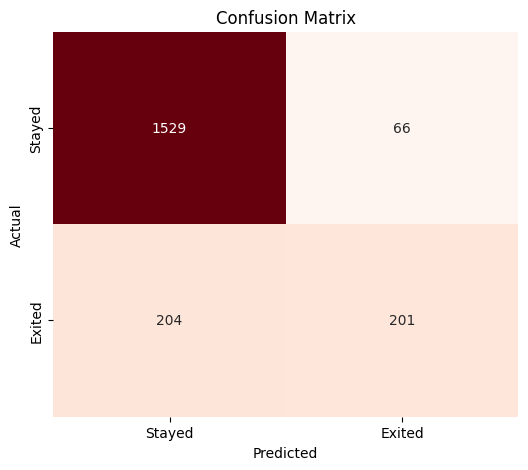

In [12]:
y_pred = (model.predict(X_test) > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
accuracy = (cm[0][0] + cm[1][1]) / len(y_test) * 100

print(f'Confusion Matrix:\n{cm}')
print(f'Accuracy: {accuracy:.2f}%')

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False, xticklabels=['Stayed', 'Exited'], yticklabels=['Stayed', 'Exited'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()